In [1]:
# loading the normal package and the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Asus\Box\CS_590_Projects\dataWithCommunityInfo.csv")

In [2]:
# Some interesting findings:
# Number of trips have yet to recover to pre-pandemic frequency -- only about 2/3 back (Jan 2023)
# Percentage of tip dropped drastically after COVID-19 pandemic, but have increase significantly to above before pandemic level (4% to 5.5%)
# Percentage of tip given is lower than I thought it would be (5% only?)

In [3]:
df.isna().sum()

Unnamed: 0.2                        0
Unnamed: 0                          0
Unnamed: 0.1                        0
Trip Start Timestamp                0
Trip End Timestamp                  0
Trip Seconds                     2233
Trip Miles                         68
Pickup Census Tract           1166086
Dropoff Census Tract          1175456
Pickup Community Area          220344
Dropoff Community Area         239458
Fare                             1508
Tip                              1507
Additional Charges               1509
Trip Total                       1509
Shared Trip Authorized              0
Trips Pooled                        0
Pickup Centroid Latitude       215874
Pickup Centroid Longitude      215874
Pickup Centroid Location       215874
Dropoff Centroid Latitude      235372
Dropoff Centroid Longitude     235372
Dropoff Centroid Location      235372
Trip Start UTC                      0
Trip Start Chicago                  0
Trip End UTC                        0
Trip End Chi

In [4]:

# Subsetting the data for time
df['date'] = df['Trip Start Timestamp'].str[:10]   
df['time_start'] = df['Trip Start Timestamp'].str[11:16]
df['ampm'] = df['Trip Start Timestamp'].str[-2:]

In [5]:
from datetime import datetime
df['date2'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['tipperc'] = (df['Tip']/(df['Fare'] + df['Additional Charges']))*100
df['count'] = 1
df['tippingnot'] = (df['Tip'] > 0)

# Checking the number of NA. Some minor absence from Tip, Trip Miles, and Trip seconds. We're deleting them. (around 3000 obs, or 0.1%)
df = df.dropna(subset=['Trip Seconds', 'Tip', 'Trip Miles', 'Fare', 'tipperc','Trip Total'])

# Also dropping some stuff where values doesnt make sense
df = df[df['tipperc'] < 1000]
df = df[df['Trip Seconds'] != 0]
df = df[(df['Trip Miles'] != 0) & (df['Trip Miles'] > 0.1)]

# Also dropping some stuff where values doesnt make sense
df = df[df['tipperc'] < 10000]

# Extracting the weekdays
df['day'] = df['date2'].dt.weekday

In [6]:
sum(df['Tip'] > 0) # Only 20% actually give tip

601202

In [7]:
# Create a mean for tip percentage and tipping
grouped_mean = df.groupby([df.date2]).mean()
grouped_sum = df.groupby([df.date2]).sum()
rolling_avg = grouped_mean.rolling(window=7).mean()
rolling_sum = grouped_sum.rolling(window=7).mean()

C:\Users\Asus\AppData\Local\Temp\ipykernel_8888\3405304761.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = df.groupby([df.date2]).mean()
C:\Users\Asus\AppData\Local\Temp\ipykernel_8888\3405304761.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_sum = df.groupby([df.date2]).sum()


Text(2020-06-13 00:00:00, 1700, 'Chicago COVID-19 Reopening')

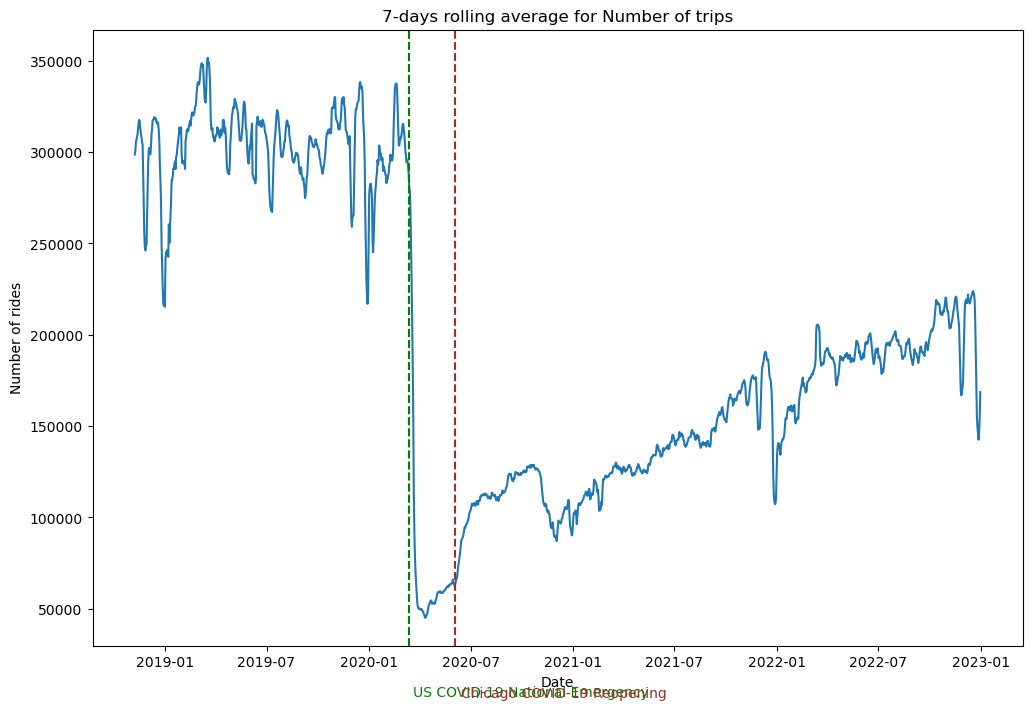

In [8]:
# Number of trips (need to be multiplied by 1000, possibly)
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(grouped_sum.index, rolling_sum['count']*100)

plt.xlabel('Date')
plt.ylabel('Number of rides')
plt.title('7-days rolling average for Number of trips')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')
plt.text(pd.to_datetime('03/20/2020', format='%m/%d/%Y'), 2000, 'US COVID-19 National Emergency', color = 'g' )

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')
plt.text(pd.to_datetime('06/13/2020', format='%m/%d/%Y'), 1700, 'Chicago COVID-19 Reopening', color = 'brown' )

Text(2020-06-13 00:00:00, 4.5, 'Chicago COVID-19 Reopening')

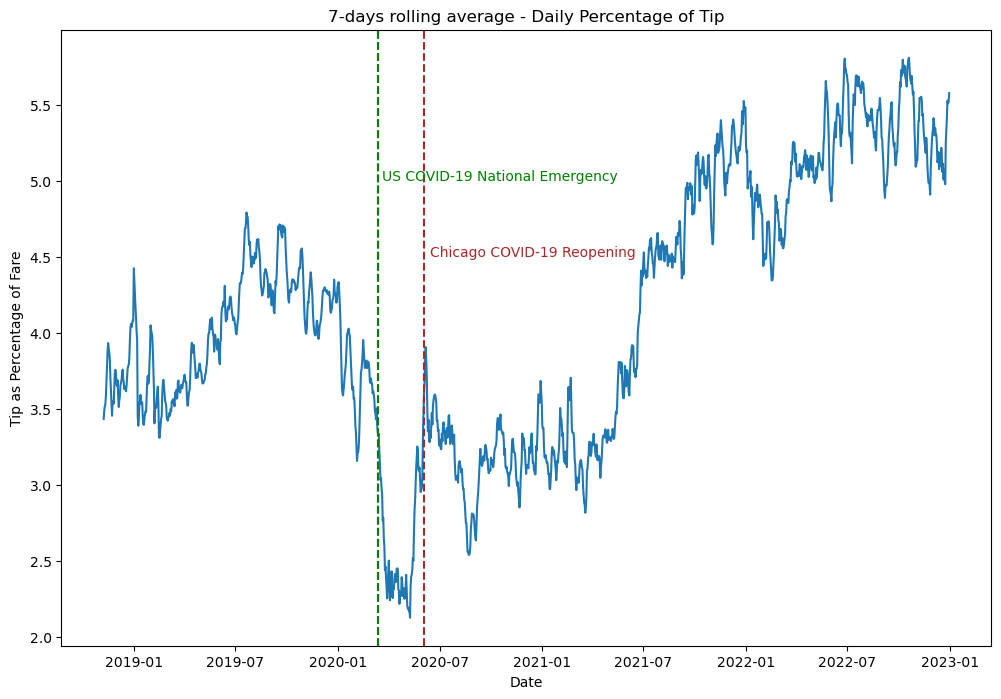

In [9]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(grouped_mean.index, rolling_avg['tipperc'])

plt.xlabel('Date')
plt.ylabel('Tip as Percentage of Fare')
plt.title('7-days rolling average - Daily Percentage of Tip')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')
plt.text(pd.to_datetime('03/20/2020', format='%m/%d/%Y'), 5, 'US COVID-19 National Emergency', color = 'g' )

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')
plt.text(pd.to_datetime('06/13/2020', format='%m/%d/%Y'), 4.5, 'Chicago COVID-19 Reopening', color = 'brown' )

Text(2020-06-13 00:00:00, 0.25, 'Chicago COVID-19 Reopening')

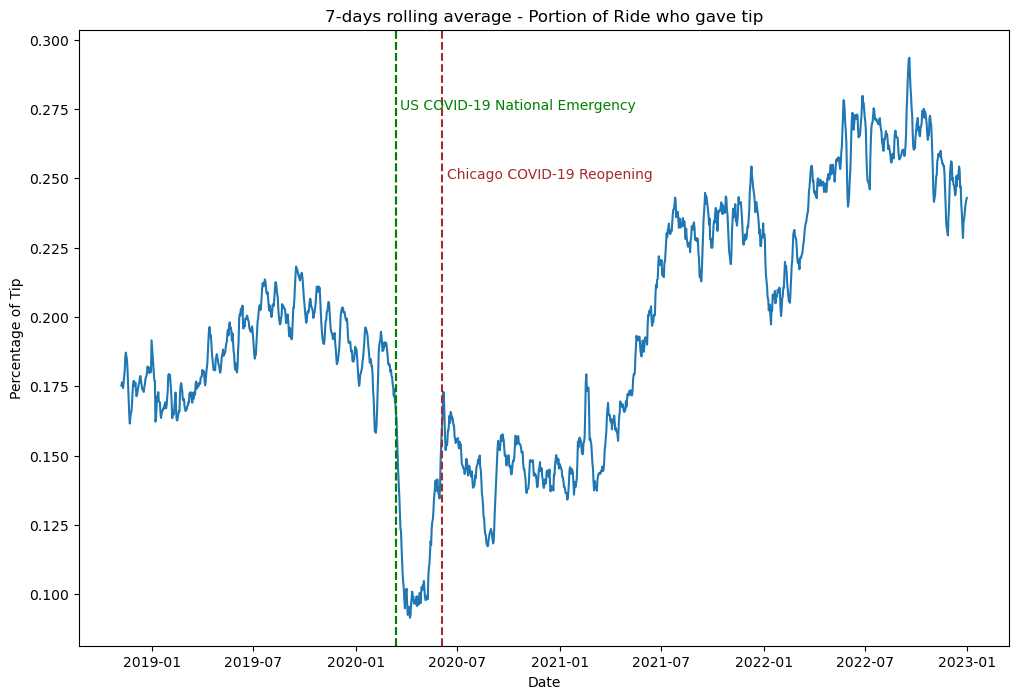

In [10]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(grouped_mean.index, rolling_avg['tippingnot'])

plt.xlabel('Date')
plt.ylabel('Percentage of Tip')
plt.title('7-days rolling average - Portion of Ride who gave tip')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')
plt.text(pd.to_datetime('03/20/2020', format='%m/%d/%Y'), 0.275, 'US COVID-19 National Emergency', color = 'g' )

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')
plt.text(pd.to_datetime('06/13/2020', format='%m/%d/%Y'), 0.25, 'Chicago COVID-19 Reopening', color = 'brown' )

In [11]:
# What is the percentage of driver who gave tip?

Text(2020-06-13 00:00:00, 4.5, 'Chicago COVID-19 Reopening')

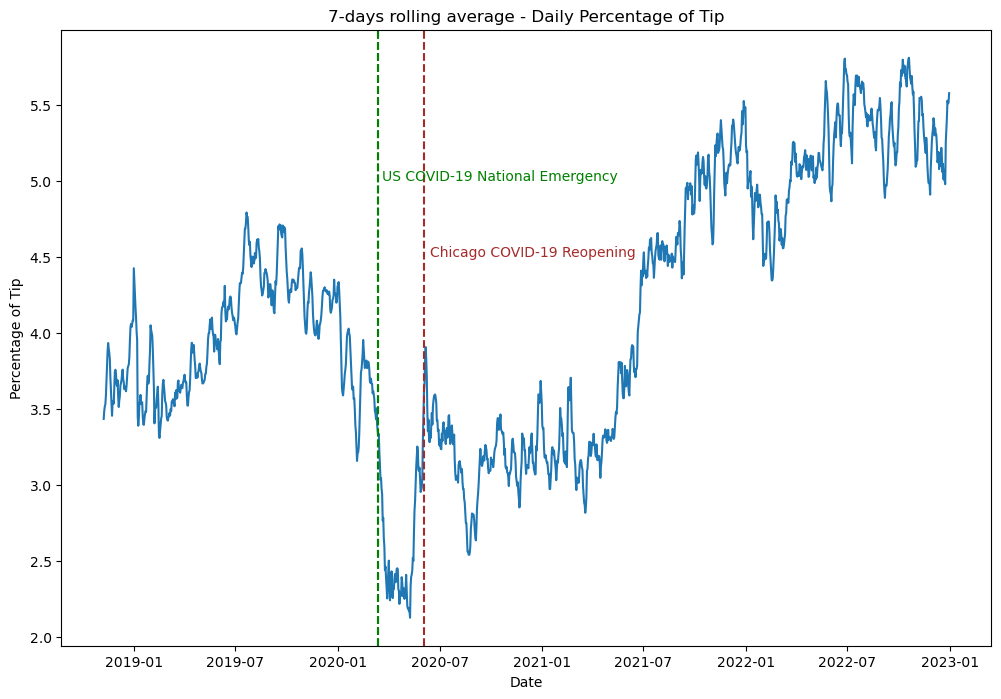

In [12]:
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(grouped_mean.index, rolling_avg['tipperc'])

plt.xlabel('Date')
plt.ylabel('Percentage of Tip')
plt.title('7-days rolling average - Daily Percentage of Tip')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')
plt.text(pd.to_datetime('03/20/2020', format='%m/%d/%Y'), 5, 'US COVID-19 National Emergency', color = 'g' )

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')
plt.text(pd.to_datetime('06/13/2020', format='%m/%d/%Y'), 4.5, 'Chicago COVID-19 Reopening', color = 'brown' )

Text(2020-06-13 00:00:00, 1.2, 'Chicago COVID-19 Reopening')

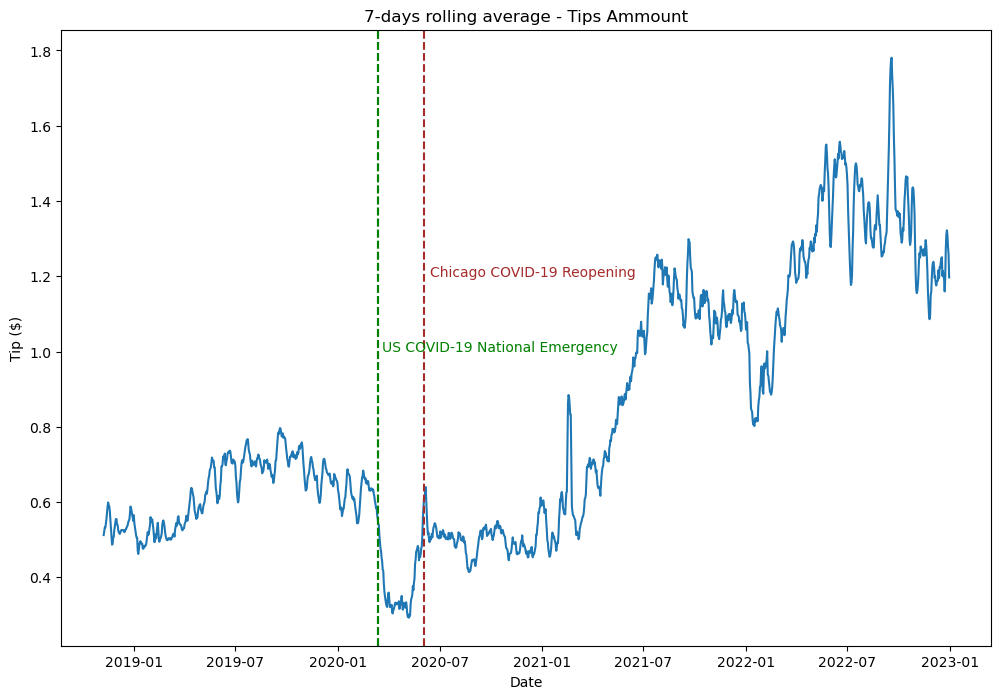

In [13]:
# Ammount of tip instead of percentage:
# Rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(grouped_mean.index, rolling_avg['Tip'])

plt.xlabel('Date')
plt.ylabel('Tip ($)')
plt.title('7-days rolling average - Tips Ammount')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')
plt.text(pd.to_datetime('03/20/2020', format='%m/%d/%Y'), 1, 'US COVID-19 National Emergency', color = 'g' )

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')
plt.text(pd.to_datetime('06/13/2020', format='%m/%d/%Y'), 1.2, 'Chicago COVID-19 Reopening', color = 'brown' )

In [14]:
grouped_mean.columns

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Trip Seconds',
       'Trip Miles', 'Pickup Census Tract', 'Dropoff Census Tract',
       'Pickup Community Area', 'Dropoff Community Area', 'Fare', 'Tip',
       'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude', 'Hour',
       'temperature_2m (°C)', 'relativehumidity_2m (%)', 'precipitation (mm)',
       'rain (mm)', 'snowfall (cm)', 'cloudcover (%)', 'windspeed_10m (km/h)',
       'winddirection_10m (°)', 'PopPickup', 'IncomePickup',
       'CarpoolPerCommPickup', 'PopDropoff', 'IncomeDropoff',
       'CarpoolPerCommDropoff', 'tipperc', 'count', 'tippingnot', 'day'],
      dtype='object')

Text(2020-06-13 00:00:00, 7.5, 'Chicago COVID-19 Reopening')

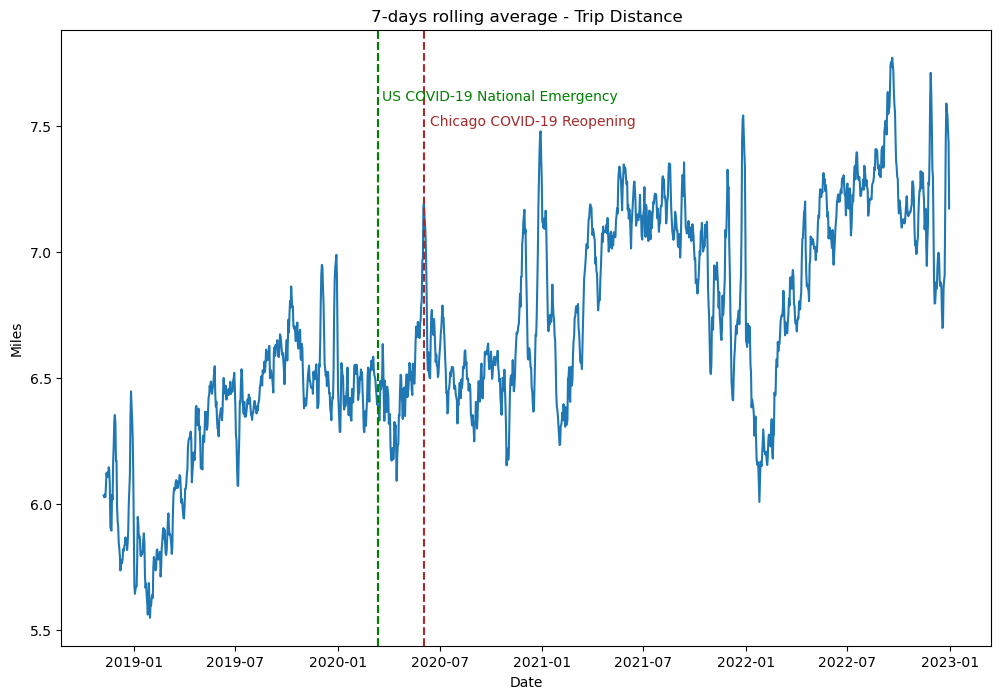

In [15]:
# Average of distance travelled and trip time (before and after pandemic)
# Non rolling average plot
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(rolling_avg.index, rolling_avg['Trip Miles'])

plt.xlabel('Date')
plt.ylabel('Miles')
plt.title('7-days rolling average - Trip Distance')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')
plt.text(pd.to_datetime('03/20/2020', format='%m/%d/%Y'), 7.6, 'US COVID-19 National Emergency', color = 'g' )

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')
plt.text(pd.to_datetime('06/13/2020', format='%m/%d/%Y'), 7.5, 'Chicago COVID-19 Reopening', color = 'brown' )

# Can Add More dates for COVID-19 checkpoints...

In [16]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Trip Start Timestamp',
       'Trip End Timestamp', 'Trip Seconds', 'Trip Miles',
       'Pickup Census Tract', 'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tip', 'Additional Charges',
       'Trip Total', 'Shared Trip Authorized', 'Trips Pooled',
       'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location',
       'Trip Start UTC', 'Trip Start Chicago', 'Trip End UTC',
       'Trip End Chicago', 'Date', 'Hour', 'time', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'cloudcover (%)', 'windspeed_10m (km/h)',
       'winddirection_10m (°)', 'Pickup Community Name', 'PopPickup',
       'IncomePickup', 'CarpoolPerCommPickup', 'Dropoff Community Name',
       'PopDropoff', 'IncomeDropoff', 'Carp

Text(0.5, 1.0, 'Tip Percentage')

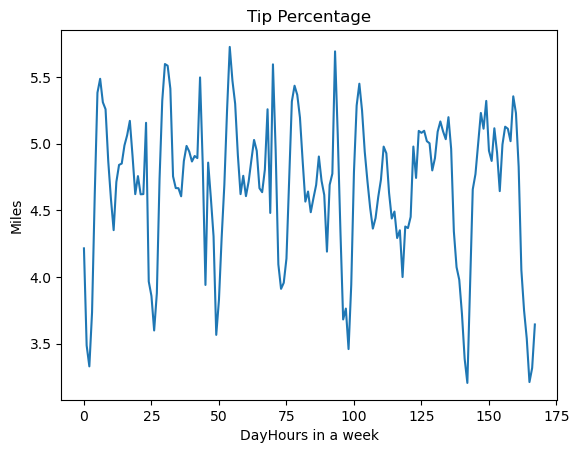

In [17]:
# Create the time of the hours metrics and tip percentage with them

df['dayhours'] = df['day']*24+df['Hour']

grouped_mean2 = df.dropna().groupby([df.dropna().dayhours])['tipperc'].mean()

plt.plot(grouped_mean2.index, grouped_mean2)

plt.xlabel('DayHours in a week')
plt.ylabel('Miles')
plt.title('Tip Percentage')

In [18]:
df.isna().sum()

Unnamed: 0.2                        0
Unnamed: 0                          0
Unnamed: 0.1                        0
Trip Start Timestamp                0
Trip End Timestamp                  0
Trip Seconds                        0
Trip Miles                          0
Pickup Census Tract           1164033
Dropoff Census Tract          1173455
Pickup Community Area          219933
Dropoff Community Area         239110
Fare                                0
Tip                                 0
Additional Charges                  0
Trip Total                          0
Shared Trip Authorized              0
Trips Pooled                        0
Pickup Centroid Latitude       215474
Pickup Centroid Longitude      215474
Pickup Centroid Location       215474
Dropoff Centroid Latitude      235035
Dropoff Centroid Longitude     235035
Dropoff Centroid Location      235035
Trip Start UTC                      0
Trip Start Chicago                  0
Trip End UTC                        0
Trip End Chi

In [19]:
df.describe()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,PopPickup,IncomePickup,CarpoolPerCommPickup,PopDropoff,IncomeDropoff,CarpoolPerCommDropoff,tipperc,count,day,dayhours
count,2.994008e+06,2.994008e+06,2.994008e+06,2.994008e+06,2.994008e+06,1.829975e+06,1.820553e+06,2.774075e+06,2.754898e+06,2.994008e+06,...,2.774075e+06,2.774075e+06,2.774075e+06,2.754898e+06,2.754898e+06,2.754898e+06,2.994008e+06,2994008.0,2.994008e+06,2.994008e+06
mean,1.499603e+06,1.499603e+06,1.500182e+06,1.069067e+03,6.539408e+00,1.703137e+10,1.703138e+10,2.671926e+01,2.730081e+01,1.451411e+01,...,6.273847e+04,6.122215e+04,5.990675e-02,6.199330e+04,6.137468e+04,5.954454e-02,4.218724e+00,1.0,3.226316e+00,8.815420e+01
std,8.661494e+05,8.661494e+05,8.659775e+05,7.607796e+02,7.309318e+00,3.386738e+05,3.431967e+05,2.110352e+01,2.144789e+01,1.205882e+01,...,3.053822e+04,3.013632e+04,3.629636e-02,3.069870e+04,2.999306e+04,3.599815e-02,1.038946e+01,0.0,1.941774e+00,4.774395e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e-01,1.703101e+10,1.703101e+10,1.000000e+00,1.000000e+00,0.000000e+00,...,2.527000e+03,1.417567e+04,1.671309e-02,2.527000e+03,1.417567e+04,1.671309e-02,0.000000e+00,1.0,0.000000e+00,0.000000e+00
25%,7.490808e+05,7.490808e+05,7.511938e+05,5.390000e+02,1.900000e+00,1.703108e+10,1.703108e+10,8.000000e+00,8.000000e+00,7.500000e+00,...,3.625700e+04,3.278764e+04,3.884218e-02,3.543900e+04,3.341315e+04,2.828974e-02,0.000000e+00,1.0,2.000000e+00,5.000000e+01
50%,1.500222e+06,1.500222e+06,1.500258e+06,8.660000e+02,3.900000e+00,1.703124e+10,1.703124e+10,2.400000e+01,2.400000e+01,1.000000e+01,...,6.788100e+04,5.963487e+04,4.873858e-02,6.302000e+04,5.963487e+04,4.873858e-02,0.000000e+00,1.0,3.000000e+00,9.000000e+01
75%,2.249823e+06,2.249823e+06,2.249767e+06,1.383000e+03,8.300000e+00,1.703183e+10,1.703183e+10,3.300000e+01,3.300000e+01,1.750000e+01,...,8.778100e+04,9.018948e+04,8.034833e-02,8.778100e+04,9.026915e+04,8.034833e-02,0.000000e+00,1.0,5.000000e+00,1.300000e+02
max,2.999999e+06,2.999999e+06,2.999999e+06,6.034100e+04,4.183000e+02,1.703198e+10,1.703198e+10,7.700000e+01,7.700000e+01,8.275000e+02,...,1.054810e+05,1.050165e+05,1.936301e-01,1.054810e+05,1.050165e+05,1.936301e-01,7.462687e+02,1.0,6.000000e+00,1.670000e+02


In [20]:
df

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,...,CarpoolPerCommDropoff,date,time_start,ampm,date2,tipperc,count,tippingnot,day,dayhours
0,0,0,0,03/24/2019 10:30:00 AM,03/24/2019 10:45:00 AM,790.0,5.6,NaN,NaN,48.0,...,0.132105,03/24/2019,10:30,AM,2019-03-24,0.000000,1,False,6,149
1,1,1,3142,03/24/2019 10:15:00 AM,03/24/2019 10:30:00 AM,664.0,5.8,1.703183e+10,1.703108e+10,3.0,...,0.028290,03/24/2019,10:15,AM,2019-03-24,15.936255,1,True,6,149
2,2,2,4320,03/24/2019 10:15:00 AM,03/24/2019 10:30:00 AM,1034.0,4.6,NaN,NaN,19.0,...,0.048778,03/24/2019,10:15,AM,2019-03-24,0.000000,1,False,6,149
3,3,3,7361,03/24/2019 10:30:00 AM,03/24/2019 11:00:00 AM,2061.0,17.6,1.703108e+10,1.703198e+10,8.0,...,0.087412,03/24/2019,10:30,AM,2019-03-24,15.360983,1,True,6,149
4,4,4,10135,03/24/2019 10:15:00 AM,03/24/2019 10:15:00 AM,503.0,1.2,1.703108e+10,1.703108e+10,8.0,...,0.028290,03/24/2019,10:15,AM,2019-03-24,0.000000,1,False,6,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,2999995,2704179,12/21/2022 02:00:00 AM,12/21/2022 02:00:00 AM,421.0,2.4,NaN,NaN,24.0,...,0.048778,12/21/2022,02:00,AM,2022-12-21,0.000000,1,False,2,68
2999996,2999996,2999996,2704564,12/21/2022 02:00:00 AM,12/21/2022 02:00:00 AM,183.0,0.9,1.703183e+10,1.703183e+10,28.0,...,0.042375,12/21/2022,02:00,AM,2022-12-21,0.000000,1,False,2,68
2999997,2999997,2999997,2705872,12/21/2022 02:00:00 AM,12/21/2022 02:15:00 AM,409.0,2.0,NaN,NaN,32.0,...,0.042375,12/21/2022,02:00,AM,2022-12-21,0.000000,1,False,2,68
2999998,2999998,2999998,2714300,12/21/2022 02:00:00 AM,12/21/2022 02:00:00 AM,548.0,2.4,1.703106e+10,1.703105e+10,6.0,...,0.065840,12/21/2022,02:00,AM,2022-12-21,0.000000,1,False,2,68


In [21]:
weekdayFri_mean3 = df[df['day'] == 5].groupby([df.Hour])['tipperc'].mean()

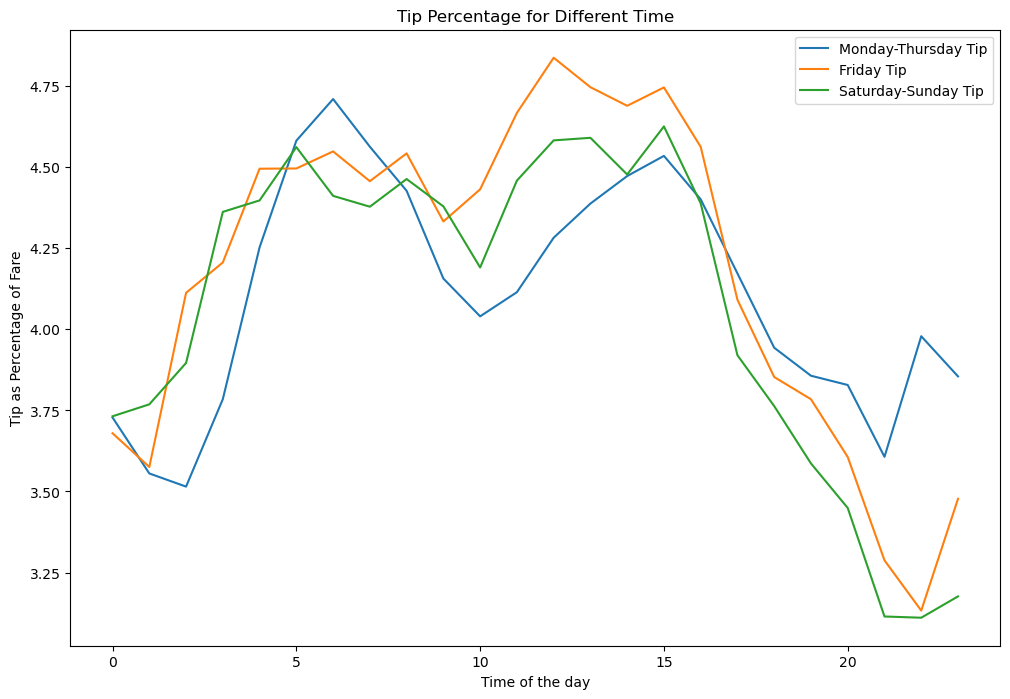

In [22]:
# Lets just do so on hours/time, for weekdays vs weekend

plt.figure(figsize=(12, 8))


weekdayMonThu_mean3 = df[df['day'] < 5].groupby([df.Hour])['tipperc'].mean() # Why does this return so many errors (solved)
weekdayFri_mean3 = df[df['day'] == 5].groupby([df.Hour])['tipperc'].mean()
weekSatSun_mean3 = df[df['day'] > 5].groupby([df.Hour])['tipperc'].mean()

plt.plot(weekdayMonThu_mean3.index, weekdayMonThu_mean3, label = 'Monday-Thursday Tip')

plt.xlabel('Time of the day')
plt.ylabel('Tip as Percentage of Fare')
plt.title('Tip Percentage for Different Time')

plt.plot(weekdayFri_mean3.index, weekdayFri_mean3, label = 'Friday Tip')
plt.plot(weekSatSun_mean3.index, weekSatSun_mean3, label = 'Saturday-Sunday Tip')


plt.legend()

# Some findings:
# Early risers give the best tip, but overall tip at early and late hours is quite good.
# This trend doesn't hold very much on the wekend

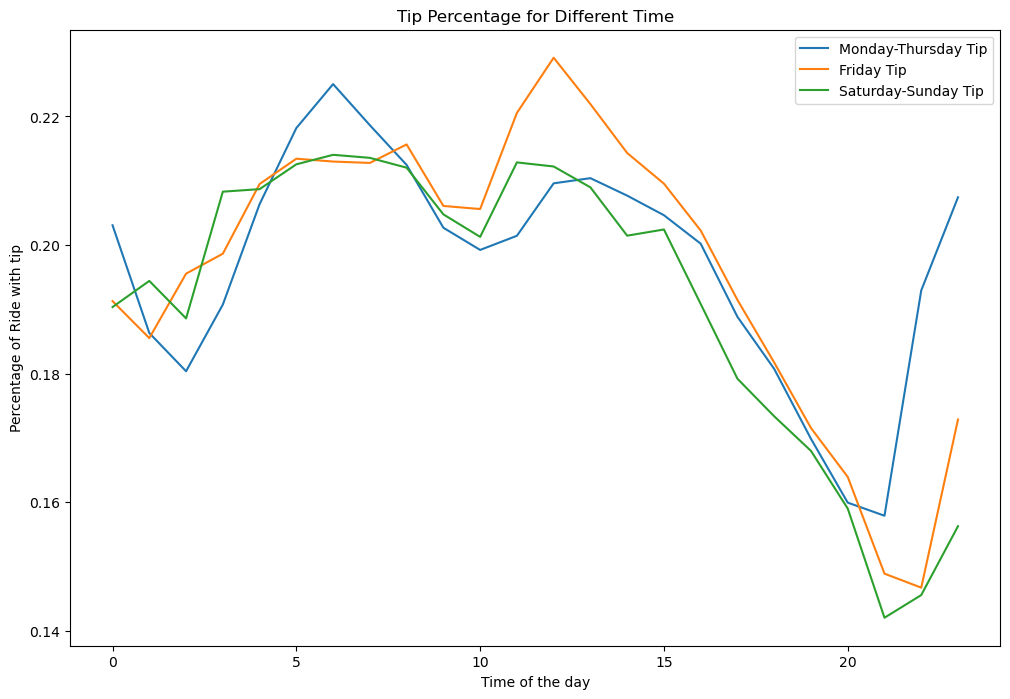

In [23]:
# Lets just do so on hours/time, for weekdays vs weekend, percentage of ride who gave tip

plt.figure(figsize=(12, 8))


weekdayMonThu_mean3 = df[df['day'] < 5].groupby([df.Hour])['tippingnot'].mean() # Why does this return so many errors (solved)
weekdayFri_mean3 = df[df['day'] == 5].groupby([df.Hour])['tippingnot'].mean()
weekSatSun_mean3 = df[df['day'] > 5].groupby([df.Hour])['tippingnot'].mean()

plt.plot(weekdayMonThu_mean3.index, weekdayMonThu_mean3, label = 'Monday-Thursday Tip')

plt.xlabel('Time of the day')
plt.ylabel('Percentage of Ride with tip')
plt.title('Tip Percentage for Different Time')

plt.plot(weekdayFri_mean3.index, weekdayFri_mean3, label = 'Friday Tip')

plt.plot(weekSatSun_mean3.index, weekSatSun_mean3, label = 'Saturday-Sunday Tip')


plt.legend()

# Some findings:
# Early risers give the best tip, but overall tip at early and late hours is quite good.
# This trend doesn't hold very much on the wekend

In [24]:
# Percentage of people who give tip (anything > 0 by time)

In [25]:
# Some ideas to do:
# Weather and tipping

In [26]:
grouped_mean2[26]

3.597811999737982

In [27]:
np.mean(df['dayhours'])

88.15420232678069

In [28]:
np.mean(df['dayhours'])

88.15420232678069

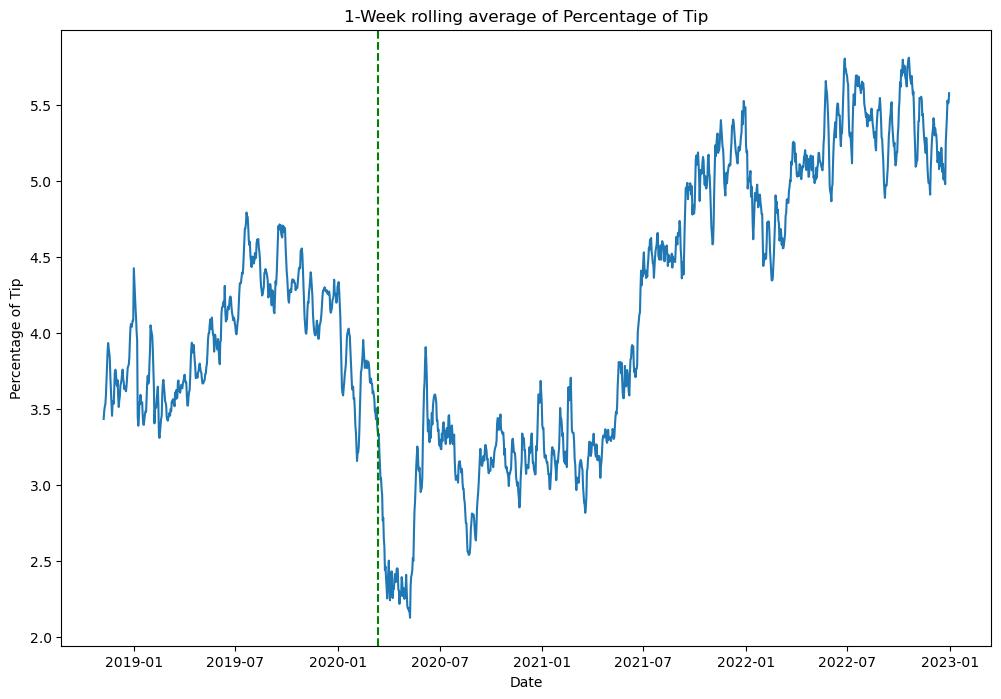

In [29]:
# Rolling average of tip percentage
plt.figure(figsize=(12, 8))

plt.plot(rolling_avg.index, rolling_avg['tipperc'])

plt.xlabel('Date')
plt.ylabel('Percentage of Tip')
plt.title('1-Week rolling average of Percentage of Tip')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

In [30]:
rolling_avg.index

DatetimeIndex(['2018-11-01', '2018-11-02', '2018-11-03', '2018-11-04',
               '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
               '2018-11-09', '2018-11-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='date2', length=1522, freq=None)